
# visualization_fuel_econ_project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re
import json
import datetime
from bs4 import BeautifulSoup
import os
import io
import glob
import tweepy
from google.colab import drive
from tweepy import OAuthHandler
from timeit import default_timer as timer
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 1- Data Gathering

In [2]:
# reading .txt file downloaded manually.
df_1 = pd.read_csv('/content/fuel_econ.csv')


In [3]:
df_1

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924,39882,Toyota,Prius Prime,2018,Midsize Cars,Front-Wheel Drive,Automatic (variable gear ratios),Regular Gasoline,4,1.8,0,0,55.2206,78.8197,53.0000,73.6525,54.4329,78,10,10
3925,39898,Hyundai,Sonata Hybrid,2018,Midsize Cars,Front-Wheel Drive,Automatic (AM6),Regular Gasoline,4,2.0,0,106,39.0000,55.9000,44.3066,64.0000,41.0000,217,9,9
3926,39899,Hyundai,Sonata Hybrid SE,2018,Midsize Cars,Front-Wheel Drive,Automatic (AM6),Regular Gasoline,4,2.0,0,106,40.0000,56.0000,46.0000,64.0000,42.0000,212,9,9
3927,39900,Lexus,LS 500,2018,Midsize Cars,Rear-Wheel Drive,Automatic (S10),Premium Gasoline,6,3.4,99,0,19.2200,24.2000,30.2863,43.4000,23.0021,387,5,5





## 2- Data Assessing

### 2-1- Tidiness issues

In [4]:
df_1

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924,39882,Toyota,Prius Prime,2018,Midsize Cars,Front-Wheel Drive,Automatic (variable gear ratios),Regular Gasoline,4,1.8,0,0,55.2206,78.8197,53.0000,73.6525,54.4329,78,10,10
3925,39898,Hyundai,Sonata Hybrid,2018,Midsize Cars,Front-Wheel Drive,Automatic (AM6),Regular Gasoline,4,2.0,0,106,39.0000,55.9000,44.3066,64.0000,41.0000,217,9,9
3926,39899,Hyundai,Sonata Hybrid SE,2018,Midsize Cars,Front-Wheel Drive,Automatic (AM6),Regular Gasoline,4,2.0,0,106,40.0000,56.0000,46.0000,64.0000,42.0000,212,9,9
3927,39900,Lexus,LS 500,2018,Midsize Cars,Rear-Wheel Drive,Automatic (S10),Premium Gasoline,6,3.4,99,0,19.2200,24.2000,30.2863,43.4000,23.0021,387,5,5


#####  Each variable forms a column and contains values
- nothing

##### Each observation forms a row
- nothing

#####  Each type of observational unit forms a table
- nothing



### 2-2- Quality issues

In [5]:
df_1

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924,39882,Toyota,Prius Prime,2018,Midsize Cars,Front-Wheel Drive,Automatic (variable gear ratios),Regular Gasoline,4,1.8,0,0,55.2206,78.8197,53.0000,73.6525,54.4329,78,10,10
3925,39898,Hyundai,Sonata Hybrid,2018,Midsize Cars,Front-Wheel Drive,Automatic (AM6),Regular Gasoline,4,2.0,0,106,39.0000,55.9000,44.3066,64.0000,41.0000,217,9,9
3926,39899,Hyundai,Sonata Hybrid SE,2018,Midsize Cars,Front-Wheel Drive,Automatic (AM6),Regular Gasoline,4,2.0,0,106,40.0000,56.0000,46.0000,64.0000,42.0000,212,9,9
3927,39900,Lexus,LS 500,2018,Midsize Cars,Rear-Wheel Drive,Automatic (S10),Premium Gasoline,6,3.4,99,0,19.2200,24.2000,30.2863,43.4000,23.0021,387,5,5


In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         3929 non-null   int64  
 1   make       3929 non-null   object 
 2   model      3929 non-null   object 
 3   year       3929 non-null   int64  
 4   VClass     3929 non-null   object 
 5   drive      3929 non-null   object 
 6   trans      3929 non-null   object 
 7   fuelType   3929 non-null   object 
 8   cylinders  3929 non-null   int64  
 9   displ      3929 non-null   float64
 10  pv2        3929 non-null   int64  
 11  pv4        3929 non-null   int64  
 12  city       3929 non-null   float64
 13  UCity      3929 non-null   float64
 14  highway    3929 non-null   float64
 15  UHighway   3929 non-null   float64
 16  comb       3929 non-null   float64
 17  co2        3929 non-null   int64  
 18  feScore    3929 non-null   int64  
 19  ghgScore   3929 non-null   int64  
dtypes: float

In [7]:
# Search for all records that contain the value '?' in any column

df_1[df_1.isnull().any(axis=1)]


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore


In [8]:
df_1.duplicated().sum()

0

In [9]:
for column in df_1.columns:
    print(f"Value counts for {column}:")
    print(df_1[column].value_counts().sort_index())
    print("\n" + "="*40 + "\n")


Value counts for id:
id
32204    1
32205    1
32206    1
32207    1
32208    1
        ..
39882    1
39898    1
39899    1
39900    1
39901    1
Name: count, Length: 3929, dtype: int64


Value counts for make:
make
Acura                 46
Alfa Romeo             6
Aston Martin          15
Audi                 201
BMW                  523
Bentley               45
Buick                 66
Cadillac             118
Chevrolet            212
Chrysler              58
Dodge                140
Ferrari               23
Fiat                  26
Ford                 218
Genesis               17
Honda                101
Hyundai              158
Infiniti             108
Jaguar                98
Karma                  1
Kia                  124
Lexus                125
Lincoln               52
Lotus                 10
MINI                 201
Maserati              39
Mazda                 87
Mercedes-Benz        269
Mitsubishi            44
Nissan                71
Porsche              235
Rolls-Royc

In [10]:
# Replace '?' with NaN and then convert to float, handling missing values
# Handle errors by ignoring them
# Alternatively, you can fill missing values with a specific number:
# df_1_cleaned = df_1.replace('?', pd.NA).fillna(0).astype(float)  # Fill missing values with 0

df_1_exp = df_1.astype(float, errors='ignore')


df_1_exp.describe()

,id,year,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
count,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000
mean,36006.724357,2015.500891,5.468313,2.950573,23.660982,59.239247,21.830462,28.044011,29.973842,42.850295,24.791339,376.564266,5.668872,5.659201
std,2189.349923,1.694775,1.878319,1.305901,37.724901,48.667549,6.246273,9.087195,5.747571,9.100423,6.003246,92.338892,1.755860,1.754589
min,32204.000000,2013.000000,2.000000,0.600000,0.000000,0.000000,10.540200,12.900000,16.559400,21.800000,12.821700,29.000000,1.000000,1.000000
25%,34087.000000,2014.000000,4.000000,2.000000,0.000000,0.000000,17.746900,22.200000,25.754200,36.000000,20.658100,315.000000,5.000000,5.000000
50%,36020.000000,2015.000000,5.000000,2.500000,0.000000,91.000000,20.823200,26.400000,29.633800,42.200000,24.000000,369.000000,5.000000,5.000000
75%,37935.000000,2017.000000,6.000000,3.600000,70.000000,100.000000,24.981400,32.264800,33.773100,48.900000,28.227100,429.000000,7.000000,7.000000
max,39901.000000,2018.000000,12.000000,7.000000,102.000000,127.000000,57.808800,83.559800,59.416900,79.100000,57.782400,692.000000,10.000000,10.000000


In [11]:
(df_1.feScore != df_1.ghgScore).sum()

98



##### 1- Completeness  :
- Nothing here.

##### 2- Validity :
- {'id'} columns must be a string.
- {'feScore'} must be drop becouse of The Fuel Economy Score (feScore) is a rating ranging from 1 to 10 that indicates a vehicle's fuel efficiency, '1' means low efficiency, and '10' means high efficiency, This is not verified in this data.

##### 3- Accuracy :
- Nothing here.

##### 4- Consistency :
- Nothing here.

## 3- Data Cleaning

In [12]:
# making a copy fromthe dataframe :
df_1_clean = df_1.copy()
df_1_clean

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924,39882,Toyota,Prius Prime,2018,Midsize Cars,Front-Wheel Drive,Automatic (variable gear ratios),Regular Gasoline,4,1.8,0,0,55.2206,78.8197,53.0000,73.6525,54.4329,78,10,10
3925,39898,Hyundai,Sonata Hybrid,2018,Midsize Cars,Front-Wheel Drive,Automatic (AM6),Regular Gasoline,4,2.0,0,106,39.0000,55.9000,44.3066,64.0000,41.0000,217,9,9
3926,39899,Hyundai,Sonata Hybrid SE,2018,Midsize Cars,Front-Wheel Drive,Automatic (AM6),Regular Gasoline,4,2.0,0,106,40.0000,56.0000,46.0000,64.0000,42.0000,212,9,9
3927,39900,Lexus,LS 500,2018,Midsize Cars,Rear-Wheel Drive,Automatic (S10),Premium Gasoline,6,3.4,99,0,19.2200,24.2000,30.2863,43.4000,23.0021,387,5,5


### 3-1- Quality issues

#### 3-2-1 Validity :

##### A- Define :

* {'id'} columns must be a string.








##### B- Code :
    

In [13]:
#{'id'} columns must be a string.
df_1_clean[['id']] = df_1_clean[['id']].astype(object)

##### C- Test:

In [14]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         3929 non-null   object 
 1   make       3929 non-null   object 
 2   model      3929 non-null   object 
 3   year       3929 non-null   int64  
 4   VClass     3929 non-null   object 
 5   drive      3929 non-null   object 
 6   trans      3929 non-null   object 
 7   fuelType   3929 non-null   object 
 8   cylinders  3929 non-null   int64  
 9   displ      3929 non-null   float64
 10  pv2        3929 non-null   int64  
 11  pv4        3929 non-null   int64  
 12  city       3929 non-null   float64
 13  UCity      3929 non-null   float64
 14  highway    3929 non-null   float64
 15  UHighway   3929 non-null   float64
 16  comb       3929 non-null   float64
 17  co2        3929 non-null   int64  
 18  feScore    3929 non-null   int64  
 19  ghgScore   3929 non-null   int64  
dtypes: float

##### A- Define :

* {'feScore'} must be drop








##### B- Code :
    

In [15]:
#{'id'} columns must be a string.
df_1_clean = df_1_clean.drop('feScore', axis=1)


##### C- Test:

In [16]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         3929 non-null   object 
 1   make       3929 non-null   object 
 2   model      3929 non-null   object 
 3   year       3929 non-null   int64  
 4   VClass     3929 non-null   object 
 5   drive      3929 non-null   object 
 6   trans      3929 non-null   object 
 7   fuelType   3929 non-null   object 
 8   cylinders  3929 non-null   int64  
 9   displ      3929 non-null   float64
 10  pv2        3929 non-null   int64  
 11  pv4        3929 non-null   int64  
 12  city       3929 non-null   float64
 13  UCity      3929 non-null   float64
 14  highway    3929 non-null   float64
 15  UHighway   3929 non-null   float64
 16  comb       3929 non-null   float64
 17  co2        3929 non-null   int64  
 18  ghgScore   3929 non-null   int64  
dtypes: float64(6), int64(6), object(7)
memory usage:

_______________________________________________________________________________________________________________________________

## 4- Data Storing  

In [17]:
df_1_clean.to_csv('cleaned_fuel_econ_data.csv')

## 5- Data Visualization

### 5-1 car Fuel consumption :

#### 5-1-1 Fuel consumption Based on brand maker :

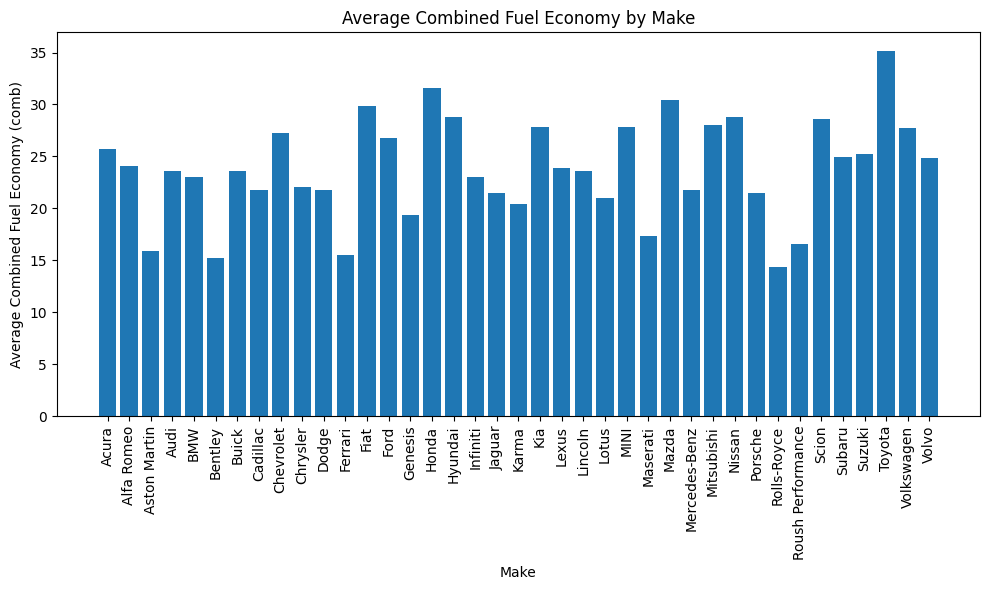

In [18]:
# Group by 'make' and calculate the average 'comb' for each group
make_avg_comb = df_1_clean.groupby('make')['comb'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(make_avg_comb.index, make_avg_comb.values)
plt.xlabel('Make')
plt.ylabel('Average Combined Fuel Economy (comb)')
plt.title('Average Combined Fuel Economy by Make')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.savefig('Fuel consumption Based on brand maker')

#### 5-1-2 Average Combined Fuel Economy by Fuel Type :

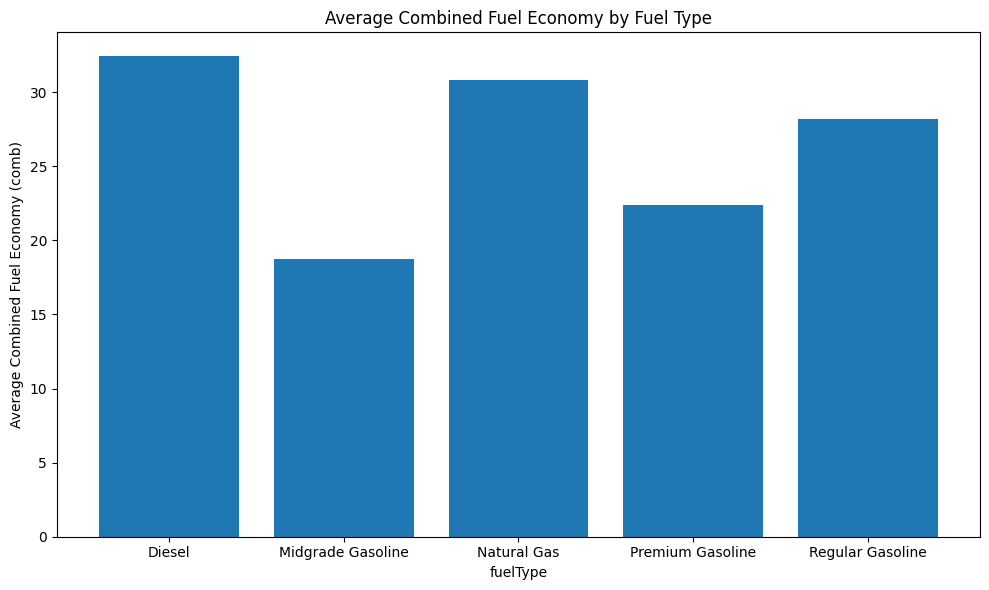

In [19]:
# prompt: bar chart between fuelType and comb

# Group by 'fuelType' and calculate the average 'comb' for each group
fuelType_avg_comb = df_1_clean.groupby('fuelType')['comb'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(fuelType_avg_comb.index, fuelType_avg_comb.values)
plt.xlabel('fuelType')
plt.ylabel('Average Combined Fuel Economy (comb)')
plt.title('Average Combined Fuel Economy by Fuel Type')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.savefig('Average Combined Fuel Economy by Fuel Type')

### 5-2 car CO2 Emissions :

#### 5-2-1 Average CO2 Emissions by fuelType :

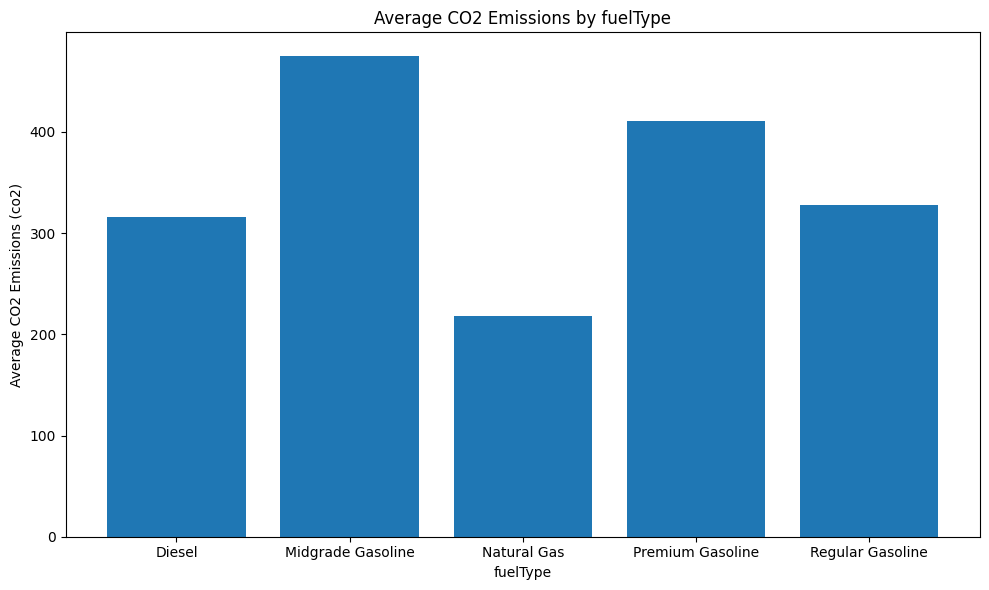

In [20]:
# prompt: bar chart between fuelType and co2

# Group by 'fuelType' and calculate the average 'co2' for each group
fuelType_avg_co2 = df_1_clean.groupby('fuelType')['co2'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(fuelType_avg_co2.index, fuelType_avg_co2.values)
plt.xlabel('fuelType')
plt.ylabel('Average CO2 Emissions (co2)')
plt.title('Average CO2 Emissions by fuelType')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.savefig('Average CO2 Emissions by fuelType')

#### 5-2-2 Average CO2 Emissions (co2) Based on year :

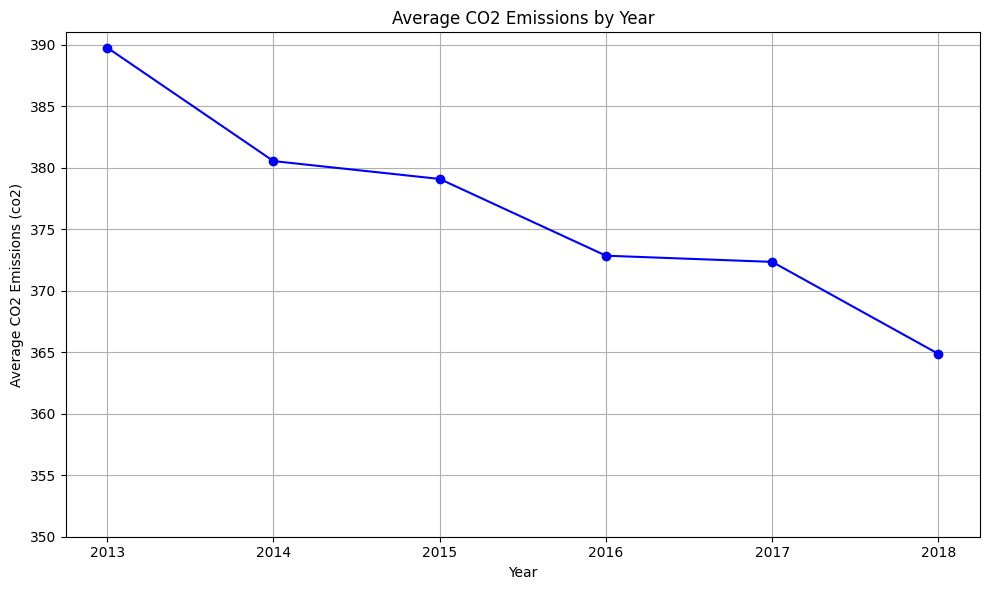

In [21]:
# Group by 'year' and calculate the average 'co2' for each group
year_avg_co2 = df_1_clean.groupby('year')['co2'].mean()

# Create a line chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(year_avg_co2.index, year_avg_co2.values, marker='o', color='blue')  # Creating a line chart with markers
plt.xlabel('Year')
plt.ylabel('Average CO2 Emissions (co2)')
plt.title('Average CO2 Emissions by Year')
plt.ylim(bottom=350)  # Set y-axis to start from 300
plt.grid(True)  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.savefig('Average CO2 Emissions (co2) Based on year')